# Model Development
A model or estimator can be thought of as a mathematical equation used to predict a value given one or more other values. Relating one or more independent variables or features to dependent variables.

For example, you input a car model’s highway miles per gallon (MPG) as the independent variable or feature, the output of the model or dependent variable is the price. More the relevant variables, more accurate the data.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear Regression:
Linear Regression will refer to one independent variable to make a prediction. Simple Linear Regression (or SLR) is: A method to help us understand the relationship between two variables: The predictor (independent) variable x, and the target (dependent) variable y.

We would like to come up with a linear relationship between the variables.
> y = b0 + b1x

b0 - intercept; b1 - slope
 
In many cases, many factors influence how much people pay for a car, for example, make or how old the car is. In this model, this uncertainty is taken into account by assuming a small random value is added to the point on the line; this is called noise.

We can summarize the process like this:
- We have a set of training points - We use these training points to fit or train the model and get parameters 
- We then use these parameters in the model
- We now have a model; we use the hat on the y to denote the model is an estimate
> y^ = b0 + b1x
- We can use this model to predict values that we haven't seen.

To fit the model in Python, first we import linear model from scikit-learn; then create a Linear Regression Object using the constructor. 

In [3]:
lr = LinearRegression()

We define the predictor variable and target variable. X - Predictor Variable, Y - Target Variable

In [4]:
X = df[["highway-mpg"]] # it should be a data frame.
Y = df["price"]

Then use the method fit() to fit the model and find the parameters b0 and b1. The input are the features and the targets.

In [5]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can obtain a prediction using the method predict(). The output is an array, the array has the same number of samples as the input X.

In [6]:
yHat = lr.predict(X)
yHat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

The intercept (b0) and the slope (b1) are attributes of the object “lr”.

In [7]:
print("The intercept b0 =",lr.intercept_," and the slope b1=",lr.coef_)

The intercept b0 = 38423.305858157386  and the slope b1= [-821.73337832]


Therefore, the relationship between Price and Highway MPG is given by the equation:
> Price = 38,423.31 - 821.73 (highway mpg)

## Multiple Linear Regression:
Multiple Linear Regression will refer to multiple independent variables to make a prediction.
Multiple Linear Regression is used to explain the relationship between one continuous target (Y) variable, and
two or more predictor (X) variables.
If we have for example 4 predictor variables, then:
y^ = b0 + b1x1 + b2x2 + b3x3 + b4x4
- B0: intercept (X=0) 
- B1: the coefficient of parameter x1
- B2: the coefficient of parameter x2 and so on

We can fit the Multiple linear regression as follows:

In [8]:
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
mlr = LinearRegression()
mlr.fit(Z, df["price"])
y1Hat = mlr.predict
y1Hat

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

The intercept and the attributes can be got from the "mlr" object.

In [9]:
print("The intercept b0 =",mlr.intercept_," and the attributes are=",mlr.coef_)

The intercept b0 = -15806.624626329198  and the attributes are= [53.49574423  4.70770099 81.53026382 36.05748882]


Therefore, the relationship between Price and other variables are given by the equation:
> Price = -15806.625 + 53.4957(horsepower) + 4.7077(curb-weight) + 81.5303(engine-size) + 36.0574(highway-mpg)

## Model Evaluation using Visualization:

### Regression plots:

These plots are a good estimate of:
- The relationship between two variables,
- The strength of the correlation, and
- The direction of the relationship (positive or negative).

The horizontal axis is the independent variable.The vertical axis is the dependent variable. Each point represents a different target point. The fitted line represents the predicted value. There are several ways to plot a regression plot; a simple way is to use "regplot" from the seaborne library.

(0, 48183.50627494014)

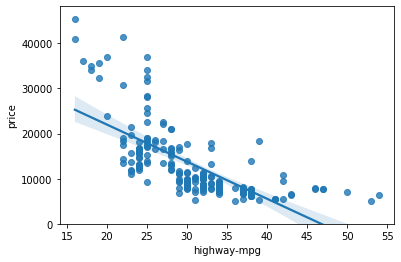

In [10]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

### Residual plot

The residual plot represents the error between the actual values. Examining the predicted value and actual value we see a difference. We obtain that value by subtracting the predicted value and the actual target value. We then plot that value on the vertical axis, with the dependent variable as the horizontal axis. We repeat the process for all the values.

Looking at the final plot gives us some insight into our data. We expect to see the results to have zero mean.
Distributed evenly around the x axis with similar variance; there is no curvature. This type of residual plot suggests a 
linear plot is appropriate.

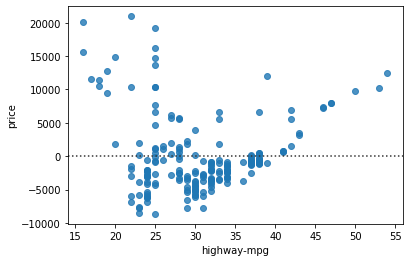

In [11]:
sns.residplot(df["highway-mpg"], df["price"])

We see in this case the Residuals have a curvature. The residuals are not randomly separated; this suggests the linear assumption is incorrect.

### Distribution plot:
A distribution plot counts the predicted value versus the actual value. These plots are extremely useful for visualizing
models with more than one independent variable or feature.

In [ ]:
ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
sns.distplot(yHat, hist=False, color="b", label="Fitted Values", ax=ax1 )

## Polynomial Regression:
Polynomial regression is a special case of the general linear regression. This method is beneficial for describing **curvilinear relationships**. A Curvilinear Relationship is a type of relationship between two variables where as one variable increases, so does the other variable, but only up to a certain point, after which, as one variable continues to increase, the other decreases.

Mathematically, it’s what you get by squaring or setting higher-order terms of the predictor variables in the model, transforming the data. The model can be quadratic, which means that the predictor variable in the model is squared.
> yHat = b0 + b1x1 + b2(x1)^2

This is a second order Polynomial regression.

The model can be cubic
> yHat = b0 + b1x1 + b2(x1)^2 + b3(x1)^3 

This is a third order Polynomial regression

There also exists higher order polynomial regressions, when a good fit hasn’t been achieved by second or third order. As the order increases, the variation in the function also increases.
The degree of the regression makes a big difference and can result in a better fit if you pick the right value.

In all cases, the relationship between the variable and the parameter is always linear.

We can generate a polynomial regression model in Python using the polyfit() function.

In [12]:
f = np.polyfit(df["highway-mpg"], df["price"],3) # 3 denotes the order
print(np.poly1d(f)) # printing the model

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


We can also have multi-dimensional polynomial linear regression. The expression can get complicated; here are just some of the terms for a two-dimensional second order polynomial.
> yHat = b0 + b1x1 + b2x2 + b3x1x2 + b4(x1)^2 + b5(x2)^2 + .....

`np.polyfit()` cannot perform this type of regression.

We use the "preprocessing" library in sci-kit-learn, to create a polynomial feature object. The constructor takes the degree of the polynomial as a parameter

In [14]:
pr = PolynomialFeatures(degree=2, include_bias=False)

Then we transform the features into a polynomial feature with the `fit_transform()`

In [15]:
xPolly = pr.fit_transform(df[["highway-mpg","curb-weight"]])
print(xPolly)

[[2.7000000e+01 2.5480000e+03 7.2900000e+02 6.8796000e+04 6.4923040e+06]
 [2.7000000e+01 2.5480000e+03 7.2900000e+02 6.8796000e+04 6.4923040e+06]
 [2.6000000e+01 2.8230000e+03 6.7600000e+02 7.3398000e+04 7.9693290e+06]
 ...
 [2.3000000e+01 3.0120000e+03 5.2900000e+02 6.9276000e+04 9.0721440e+06]
 [2.7000000e+01 3.2170000e+03 7.2900000e+02 8.6859000e+04 1.0349089e+07]
 [2.5000000e+01 3.0620000e+03 6.2500000e+02 7.6550000e+04 9.3758440e+06]]


As the dimension of the data gets larger we may want to normalize multiple features in scikit-learn, instead, we can use the preprocessing module to simplify many tasks. For example, we can Standardize each feature simultaneously. We use “StandardScaler” to train the object, fit the scale object; then transform the data into a new dataframe on array “x_scale”.

In [16]:
xData = df[["horsepower","highway-mpg"]]
print(xData.head())
scale = StandardScaler()
scale.fit(xData)
scale.transform(xData)

   horsepower  highway-mpg
0       111.0           27
1       111.0           27
2       154.0           26
3       102.0           30
4       115.0           22


array([[ 0.20375448, -0.54228772],
       [ 0.20375448, -0.54228772],
       [ 1.3574159 , -0.689386  ],
       [-0.03770954, -0.10099285],
       [ 0.31107182, -1.27777915],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.9818052 , -1.57197573],
       [-0.06453888, -0.24809114],
       [-0.06453888, -0.24809114],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.83648429],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.57197573],
       [-1.48649365,  3.28226775],
       [-0.89624827,  1.81128488],
       [-0.89624827,  1.81128488],
       [-0.94990694,  1.51708831],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.41332024, -0.10099285],
       [ 1.11595188,

## Pipelines:
There are many steps to getting a prediction, for example, Normalization, Polynomial transform, and Linear regression. We simplify the process using a pipeline. Pipelines sequentially perform a series of transformation. The last step carries out a prediction. We create a list of tuples, the first element in the tuple contains the name of the estimator: model, the second element contain model constructor.

In [17]:
inputPipe = [("scale", StandardScaler()),("polyNo", PolynomialFeatures(degree=2)),("model", LinearRegression())]

We input the list in the pipeline constructor. We now have a pipeline object.

In [18]:
pipeObj = Pipeline(inputPipe)

We can train the pipeline by applying the train method to the Pipeline object. We can also produce a prediction as well. The method normalizes the data, performs a polynomial transform, then outputs a prediction.

In [21]:
pipeObj.predict()

## Measures for in-sample evaluation:
These measures are a way to numerically determine how good the model fits on our data. Two important measures that we often use to determine the fit of a model are: 
- Mean Square Error (MSE)
- R-squared.

To measure the MSE, we find the difference between the actual value y and the predicted value yhat then square it. We then take the Mean or average of all the errors by adding then all together and dividing by the number of samples. To find the MSE in Python, we can import the “mean_Squared_error()” from “scikit-learn.metrics”. It takes two inputs: the actual value of target variable and the predicted value of target variable.

In [23]:
mean_squared_error(df["price"], yPredictSimpleFit)

R-squared is also called the coefficient of determination. It’s a measure to determine how close the data is to the fitted regression line. Think about it as comparing a regression model to a simple model, i.e., the mean of the data points. If the variable x is a good predictor our model should perform much better than \[with\] just the mean.
> R^2 = 1 - (MSE of regression line / MSE of average data)

For the most part, it takes values between 0 and 1.

MSE of regression line has to be lowest & MSE of average data has to be large.
In such case, a small number/a large number ~ 0. Therefore, R^2 ~ 1. This means the line is a good fit. If R^2 is close to 0 then the line is not a good fit.

We find the R-squared value in Python by using the score() method, in the linear regression object.

In [25]:
lr.score()

-gives the R^2 value.= 0.496854 - approximately 49.695% of the variation of price is explained by this simple linear model.
 
Your R^2 value is usually between 0 and 1, if your R^2 is negative it can be due to overfitting.

## Comparing MLR and SLR:
- Is a lower MSE always implying a better fit?
-Not necessarily.

MSE for an MLR model will be smaller than the MSE for an SLR model, since the errors of the data will decrease when more variables are included in the model.

Polynomial regression will also have a smaller MSE then regular regression.

A similar inverse relationship holds for R^2.